**Decision Tree Classifier - Company Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Read csv file
df_company = pd.read_csv('Company_Data.csv')
df_company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


**EDA (Exploratory Data Analysis)**

In [3]:
df_company.shape

(400, 11)

In [4]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df_company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
# Separate the companies those giving above average sales as (1) and below average sales as (0) and populate into new column 'Sales_cat'
df_company['Sales_cat'] = df_company['Sales']
df_company.loc[df_company.Sales_cat < 7.5, 'Sales_cat'] = 0
df_company.loc[df_company.Sales_cat >= 7.5, 'Sales_cat'] = 1
df_company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1.0
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1.0
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1.0
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0.0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0.0


In [7]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
 11  Sales_cat    400 non-null    float64
dtypes: float64(2), int64(7), object(3)
memory usage: 37.6+ KB


In [8]:
# Check the unique values of object columns before converting them into respective numerical categorical values
columns = ['ShelveLoc', 'Urban', 'US']

for i in columns:
  print(df_company[i].value_counts())

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
Yes    282
No     118
Name: Urban, dtype: int64
Yes    258
No     142
Name: US, dtype: int64


In [9]:
# For ShelveLoc column, LabelEncoder is giving value for Good as 1 and Medium as 2. Values are not in expected order. 
# Hence, updating column separately for best fit.

df_company.loc[df_company.ShelveLoc == 'Bad', 'ShelveLoc'] = 0
df_company.loc[df_company.ShelveLoc == 'Medium', 'ShelveLoc'] = 1
df_company.loc[df_company.ShelveLoc == 'Good', 'ShelveLoc'] = 2


In [10]:
columns = ['ShelveLoc', 'Urban', 'US', 'Sales_cat']

for i in columns:
  df_company[i] = df_company[i].astype('category')

df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
 11  Sales_cat    400 non-null    category
dtypes: category(4), float64(1), int64(7)
memory usage: 27.2 KB


In [11]:
# Convert string values into category codes

columns = ['Urban', 'US']

labelencoder = LabelEncoder()
for i in columns:
  df_company[i] = labelencoder.fit_transform(df_company[i])

df_company.head()
  

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,9.50,138,73,11,276,120,0,42,17,1,1,1.0
1,11.22,111,48,16,260,83,2,65,10,1,1,1.0
2,10.06,113,35,10,269,80,1,59,12,1,1,1.0
3,7.40,117,100,4,466,97,1,55,14,1,1,0.0
4,4.15,141,64,3,340,128,0,38,13,1,0,0.0


**Draw plots to understand relations and distributions**

In [12]:
df_company.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955,-0.015419,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197,0.066594,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855,0.037967,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594,0.042035,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378,-0.052025,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747,0.047016,0.057861
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488,0.028479,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000,-0.033094,-0.078250
Urban,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,0.028479,-0.033094,1.000000,0.047085
US,0.177093,0.016869,0.089601,0.684460,0.060564,0.057861,0.008652,-0.078250,0.047085,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


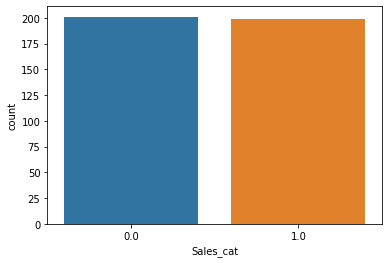

In [13]:
# Check the distribution of output variable
sns.countplot(df_company['Sales_cat'])

**Splitting Data before model creation**

In [14]:
x = df_company.iloc[:, 1:-1]
y = df_company.iloc[:,-1]
print('x: ', x.shape)
print('y: ', y.shape)

x:  (400, 10)
y:  (400,)


In [15]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   CompPrice    400 non-null    int64   
 1   Income       400 non-null    int64   
 2   Advertising  400 non-null    int64   
 3   Population   400 non-null    int64   
 4   Price        400 non-null    int64   
 5   ShelveLoc    400 non-null    category
 6   Age          400 non-null    int64   
 7   Education    400 non-null    int64   
 8   Urban        400 non-null    int64   
 9   US           400 non-null    int64   
dtypes: category(1), int64(9)
memory usage: 28.8 KB


In [16]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

**Builidng Decision Tree Classifier using Entropy Criterion**

In [17]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

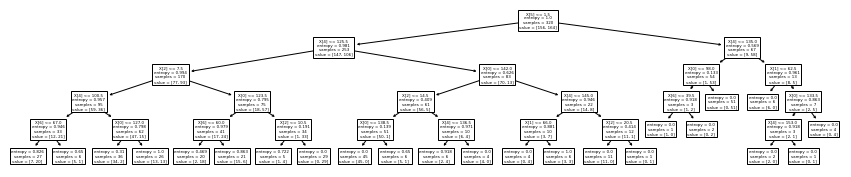

In [18]:
plt.figure(figsize=(15,3))
tree.plot_tree(model)
plt.show()

In [19]:
# Prediction for test data
preds = model.predict(x_test)

In [20]:
# Create cross table for understanding of predidictions
pd.crosstab(y_test, preds)

col_0,0.0,1.0
Sales_cat,,
0.0,35,10
1.0,11,24


In [21]:
# test accuracy
accuracy = (34+24) / (34+24+11+11)
print('Accuracy of model prediction on test data: ', accuracy)

Accuracy of model prediction on test data:  0.725


In [22]:
confusion_matrix(y_test, preds)

array([[35, 10],
       [11, 24]])

In [23]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.76      0.78      0.77        45
         1.0       0.71      0.69      0.70        35

    accuracy                           0.74        80
   macro avg       0.73      0.73      0.73        80
weighted avg       0.74      0.74      0.74        80



Observation: The createed Decision Tree model with entroy criterion is giving 72% accuracy. 

**Builidng Decision Tree Classifier using Gini Criterion**

In [24]:
model = DecisionTreeClassifier(criterion='gini', max_depth=5)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

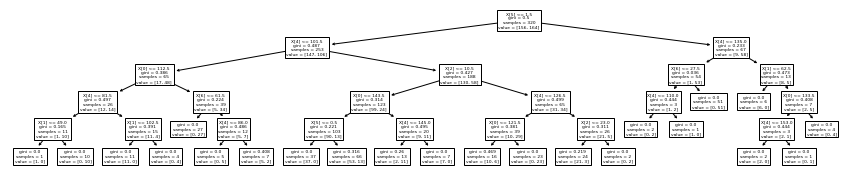

In [25]:
plt.figure(figsize=(15,3))
tree.plot_tree(model)
plt.show()

In [26]:
# Prediction for test data
preds = model.predict(x_test)

In [27]:
# Create cross table for understanding of predidictions
pd.crosstab(y_test, preds)

col_0,0.0,1.0
Sales_cat,,
0.0,37,8
1.0,14,21


In [28]:
# test accuracy
accuracy = (37+21) / (37+21+8+14)
print('Accuracy of model prediction on test data: ', accuracy)

Accuracy of model prediction on test data:  0.725


In [29]:
confusion_matrix(y_test, preds)

array([[37,  8],
       [14, 21]])

In [30]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.73      0.82      0.77        45
         1.0       0.72      0.60      0.66        35

    accuracy                           0.73        80
   macro avg       0.72      0.71      0.71        80
weighted avg       0.72      0.72      0.72        80



Observation: The createed Decision Tree model with gini criterion is also giving 72% accuracy. 

**Decision Tree Regressor**

In [31]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [32]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [33]:
# Prediction
preds = model.predict(x_test)

In [34]:
confusion_matrix(y_test, preds)

array([[33, 12],
       [12, 23]])

In [35]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.73      0.73      0.73        45
         1.0       0.66      0.66      0.66        35

    accuracy                           0.70        80
   macro avg       0.70      0.70      0.70        80
weighted avg       0.70      0.70      0.70        80



Observation: Decision Regressor is also giving 70% accuracy.